In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from statistics import mean

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
from math import exp

### 1) Implementing some important functions for Social Network Analysis

### Degree Centrality 

#### Assumption: important nodes have many connections.
#### The most basic measure of centrality: number of neighbors.

In [3]:
def degree_centrality(G1):
    #Code to figure out the person who has the biggest number of neighbors 
    maximum = 0 
    node = 0
    degree_centrality = nx.degree_centrality(G1)
    for i in G1.nodes() : 
        if (degree_centrality[i]> maximum)  : 
            maximum = degree_centrality[i]
            node = i 
    #print(node)
    return node 

In [4]:
def top_percent_degree_centrality(G1 , per = 0.02):
    degree_centrality = nx.degree_centrality(G1)

    lis=[]
    dic = dict(degree_centrality)

    #Top per of the data 
    n= int(per * G1.number_of_nodes())

    for i in range (0,n) :
        maximum = 0 
        node = 0
        for elt in dic : 
            if dic[elt]> maximum  : 
                maximum = dic[elt]
                node = elt
            
        del dic[node]
        lis.append(node)
    lis_degree=lis
    #print(lis_degree)
    return lis_degree

### Closeness centrality

#### Assumption: important nodes are close to other nodes.

In [5]:
def closeness_centrality(G1):
    maximum = 0 
    node = 0
    closeness_centrality = nx.closeness_centrality(G1)
    for i in G1.nodes() : 
        if closeness_centrality[i]> maximum  : 
            maximum = closeness_centrality[i]
            node = i 
    #print(node)
    return node 

In [6]:
def top_percent_closeness_centrality(G1 , per = 0.02 ):
    closeness_centrality = nx.closeness_centrality(G1)

    lis=[]
    dic = dict(closeness_centrality)

    #Top percent of the data 
    n= int(per * G1.number_of_nodes())

    for i in range (0,n) :
        maximum = 0 
        node = 0
        for elt in dic : 
            if dic[elt]> maximum  : 
                maximum = dic[elt]
                node = elt
            
        del dic[node]
        lis.append(node)
    lis_closeness=lis
    #print(lis_closeness)
    return lis_closeness

### Betweenness Centrality

#### Assumption: important nodes connect other nodes.

In [7]:
def betweenness_centrality(G1):
    maximum = 0 
    node = 0
    betweenness_centrality = nx.betweenness_centrality(G1)
    for i in G1.nodes() : 
        if betweenness_centrality[i]> maximum  : 
            maximum = betweenness_centrality[i]
            node = i 
    #print(node)
    return node 

In [8]:
def top_percent_betweenness_centrality(G1 , per = 0.02):
    betweenness_centrality = nx.betweenness_centrality(G1)

    lis=[]
    dic = dict(betweenness_centrality)

    #Top per of the data 
    n= int(per * G1.number_of_nodes())

    for i in range (0,n) :
        maximum = 0 
        node = 0
        for elt in dic : 
            if dic[elt]> maximum  : 
                maximum = dic[elt]
                node = elt
            
        del dic[node]
        lis.append(node)
    lis_betweenness=lis
    #print(lis_betweenness)
    return lis_betweenness

### Graph functions

In [9]:
def draw_graph (G_sample):
    # draw the network G1
    fig= plt.figure(figsize=(15,10))
    nx.draw_networkx(G_sample,with_labels=False,node_size=20,node_color='b')
    return 

In [10]:
def color_list_of_nodes_in_graph (list1 , list2 , G ,node_size=40) :
    # given a list of nodes it colors the list of nodes in blue and the rest in green 
    color_map = []
    for node in G.nodes() :
        if node in list1 :
            color_map.append('red')
        elif node in list2 : 
            color_map.append('green')
        else: color_map.append('blue')
    fig= plt.figure(figsize=(18,14))
    nx.draw(G,node_color = color_map,with_labels=False,node_size=40,edge_color='Gray',alpha=0.9)
    plt.show()

In [133]:
def color_list_of_nodes_in_graph_centrality (list1 , list2 , G , centrality) :
    # given a list of nodes it colors the list of nodes in blue and the rest in green 
    color_map = []
    size_map = []
    for node in G.nodes() :
        if node in list1 :
            color_map.append('red')
        elif node in list2 : 
            color_map.append('green')
        else: color_map.append('blue')
        
        size_map.append(int(exp(centrality[node]+1)*100))
        
    fig= plt.figure(figsize=(18,14))
    nx.draw(G,node_color = color_map,with_labels=False,node_size=size_map,edge_color='Gray',alpha=0.9)
    plt.show()

In [12]:
def color_list_of_nodes_in_graph_centrality_weight (list1 , list2 , G , centrality) :
    # given a list of nodes it colors the list of nodes in blue and the rest in green 
    color_map = []
    size_map = []
    
    for node in G.nodes() :
        if node in list1 :
            color_map.append('red')
        elif node in list2 : 
            color_map.append('green')
        else: color_map.append('blue')
        
        size_map.append(int(exp(centrality[node]+1)*1000))
    
    edges , weights = zip(*nx.get_edge_attributes(G,'weight').items())
    
    listing = []
    for weight in weights : 
        listing.append(exp(weight+1)*1000)
    weight = tuple (listing)
    
    fig= plt.figure(figsize=(18,14))
    nx.draw(G,node_color = color_map,font_color ='white',edgelist=edges,edge_color=weight ,edge_cmap = plt.cm.Blues ,with_labels=True,node_size=size_map,alpha=0.9)
    plt.show()

### clustering functions 

In [13]:
def add_score(G,score) :
    # adds score to nodes given a dictionnary of nodes and there score
    i=0
    for node in G.nodes() : 
        G.add_node(node, score = score[node])
        i+=1
    return

In [14]:
def bad_good_lists (G):
    # creating two lists of very_good and very_bad people in a graph
    # 0 : very bad ; # 1: very good 
    list1 = []
    list2 = []

    for node in G.nodes() : 
        if G.node[node]['score'] == -1 : 
            list1.append(node)
    
    for node in G.nodes() : 
        if G.node[node]['score'] == 1 : 
            list2.append(node)
    return (list1,list2)

In [98]:
def add_weights(G,weights) :
    # adds score to nodes given a dictionnary of nodes and there score
    i=0
    for edge in G.edges() : 
        G.add_edge(edge[0],edge[1],weight=weights[edge[0]][edge[1]])
        i+=1
    return

### 2) Data creation ( Adding score for each node randomly )

In [15]:
matrix = pd.read_csv('facebook_edges.csv')

In [16]:
numpy_matrix = matrix.as_matrix()

In [17]:
numpy_matrix.shape 

(84243, 2)

In [18]:
import networkx as nx
G = nx.Graph()

In [19]:
G.add_edges_from(numpy_matrix , score = 0)

In [20]:
random = np.random.choice([-1,0,1], size=(len(G.nodes()),1), p=[1/4, 1/2 ,1/4])

In [21]:
rand = np.random.rand(numpy_matrix.shape[0],1)

In [22]:
score={}
i=0
for node in G.nodes() : 
    score[node]=random[i][0]
    i+=1

In [96]:
weights={}
i=0 
for edge in G.edges(): 
    random = rand[i][0]
    G[edge[0]][edge[1]]['weight']= random
    weights[(edge[0],edge[1])]=random
    i+=1

In [109]:
set(weights.values())

{0.8538068388904776,
 0.8522984757369159,
 0.8957478335132691,
 0.09433833608068198,
 0.3866665373481055,
 0.6737792406568133,
 0.34845853924878156,
 0.3701614429288611,
 0.3882378022311741,
 0.42902646259437915,
 0.8707890986661369,
 0.013746158298282518,
 0.4502293767303097,
 0.3234614164943399,
 0.9148939944412937,
 0.6090851882925009,
 0.5327589713350287,
 0.8057229737188768,
 0.05823030584921207,
 0.10825575105661545,
 0.24945505914763333,
 0.6926558188666457,
 0.8904609339086119,
 0.7147224505241871,
 0.8749192241613053,
 0.5800530976940643,
 0.8229653828722961,
 0.872674495508753,
 0.08273988356962925,
 0.9441426769605094,
 0.8105643862515948,
 0.13736152838369575,
 0.026407885902659967,
 0.5173411890592089,
 0.7740240030036815,
 0.42838757461893084,
 0.958570320269928,
 0.04073487727612257,
 0.18920940968848765,
 0.3916826529980427,
 0.8273367456522466,
 0.8151887622502728,
 0.4805430860346861,
 0.7363140903685236,
 0.6683518518984785,
 0.22479419768023956,
 0.4269478054587843,

In [25]:
score;

In [26]:
add_score(G,score)

In [27]:
list1=bad_good_lists (G)[0]
list2=bad_good_lists (G)[1]

### 3) Drawing the whole Graph 

In [28]:
# labled -1 : very bad : color red
# labeled 1 : very good : color yellow 
# labeled 0 : ordinary person : color blue 

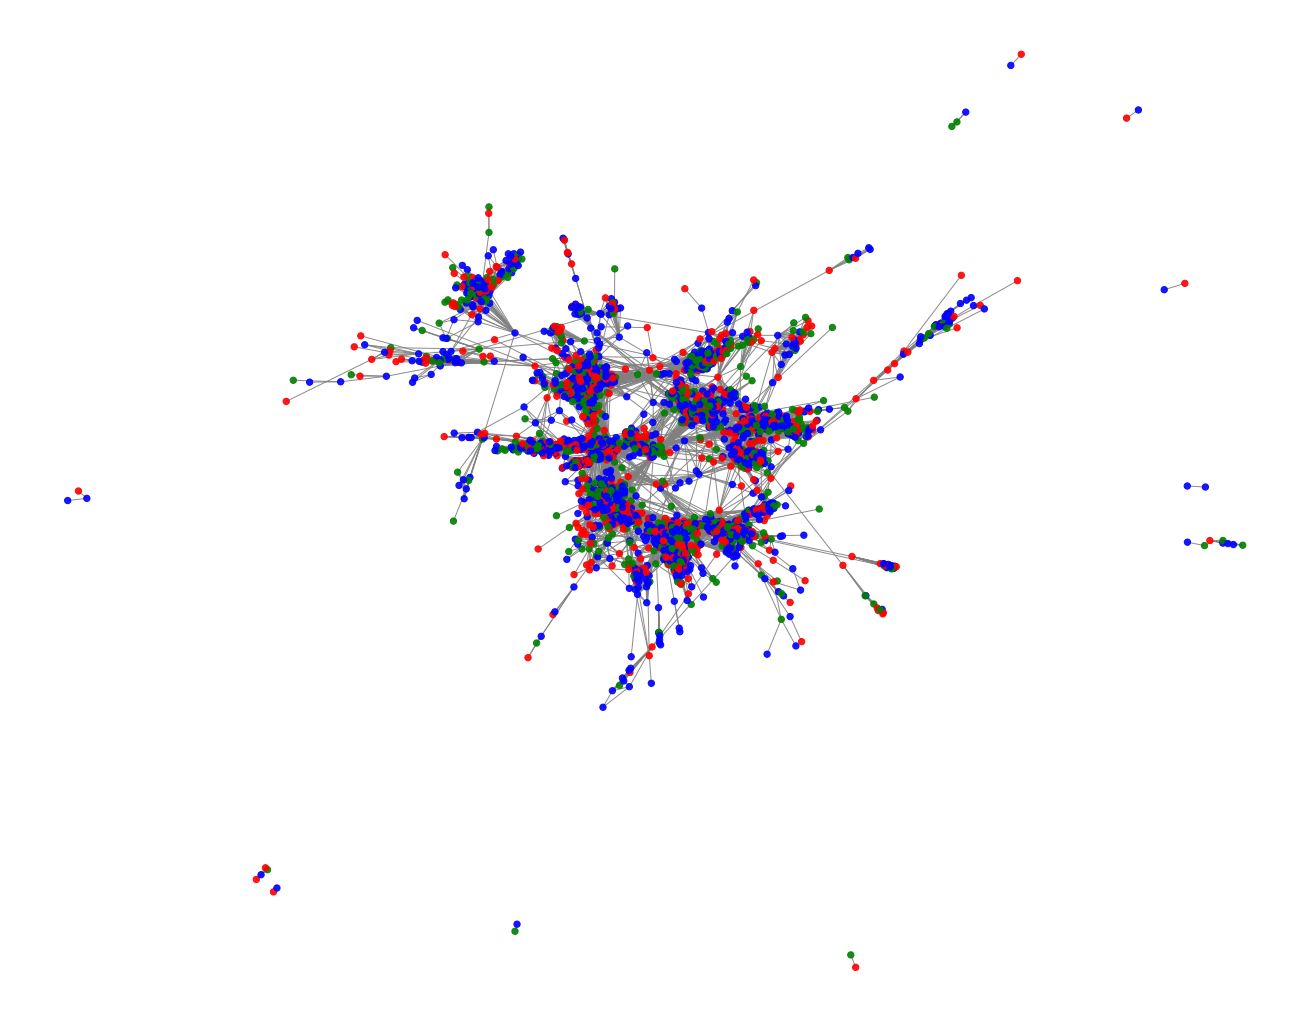

In [29]:
color_list_of_nodes_in_graph (list1 , list2 , G) 

### 4) Communities in the network 

In [30]:
import community 

In [31]:
#first compute the best partition
partition = community.best_partition(G)

In [32]:
# list of lists where each list contain nodes of a single community 
list_of_communities=[]
count = 0
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    list_of_communities.append(list_nodes)

In [33]:
count

39.0

In [34]:
sample_array = np.array(numpy_matrix)

### 5) Focusing on one community as example 

##### id : 7

In [35]:
# number of community
k = 7 

In [36]:
# number of nodes in the k th community 
len(list_of_communities[k])

10

In [37]:
list_eges_community_k = []
for i in range(sample_array.shape[0]): 
    if sample_array[i][0] in list_of_communities[k] : 
        if sample_array[i][1] in list_of_communities[k] : 
            list_eges_community_k.append([sample_array[i][0],sample_array[i][1]])

In [38]:
# creating an array of the k th community 
sample_array=np.array(list_eges_community_k)

In [39]:
# number of edges in the community 
sample_array.shape

(39, 2)

In [40]:
# creating the G_sample graph of the k th community 

# Instantiate the graph
G_sample = nx.Graph()
# add node/edge pairs
G_sample.add_edges_from(sample_array)

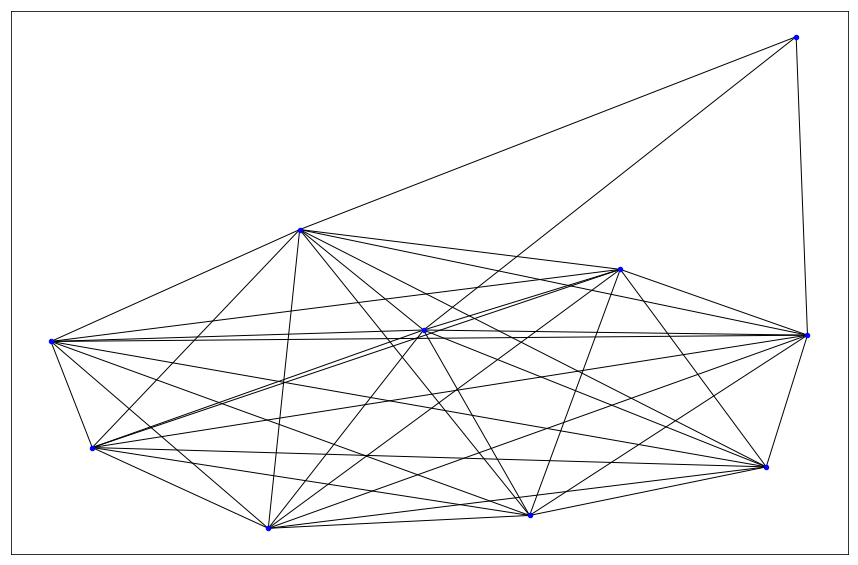

In [41]:
draw_graph (G_sample)

In [42]:
add_score(G_sample,score)

In [43]:
bad_good_lists (G_sample)

list1=bad_good_lists (G_sample)[0]
list2=bad_good_lists (G_sample)[1]

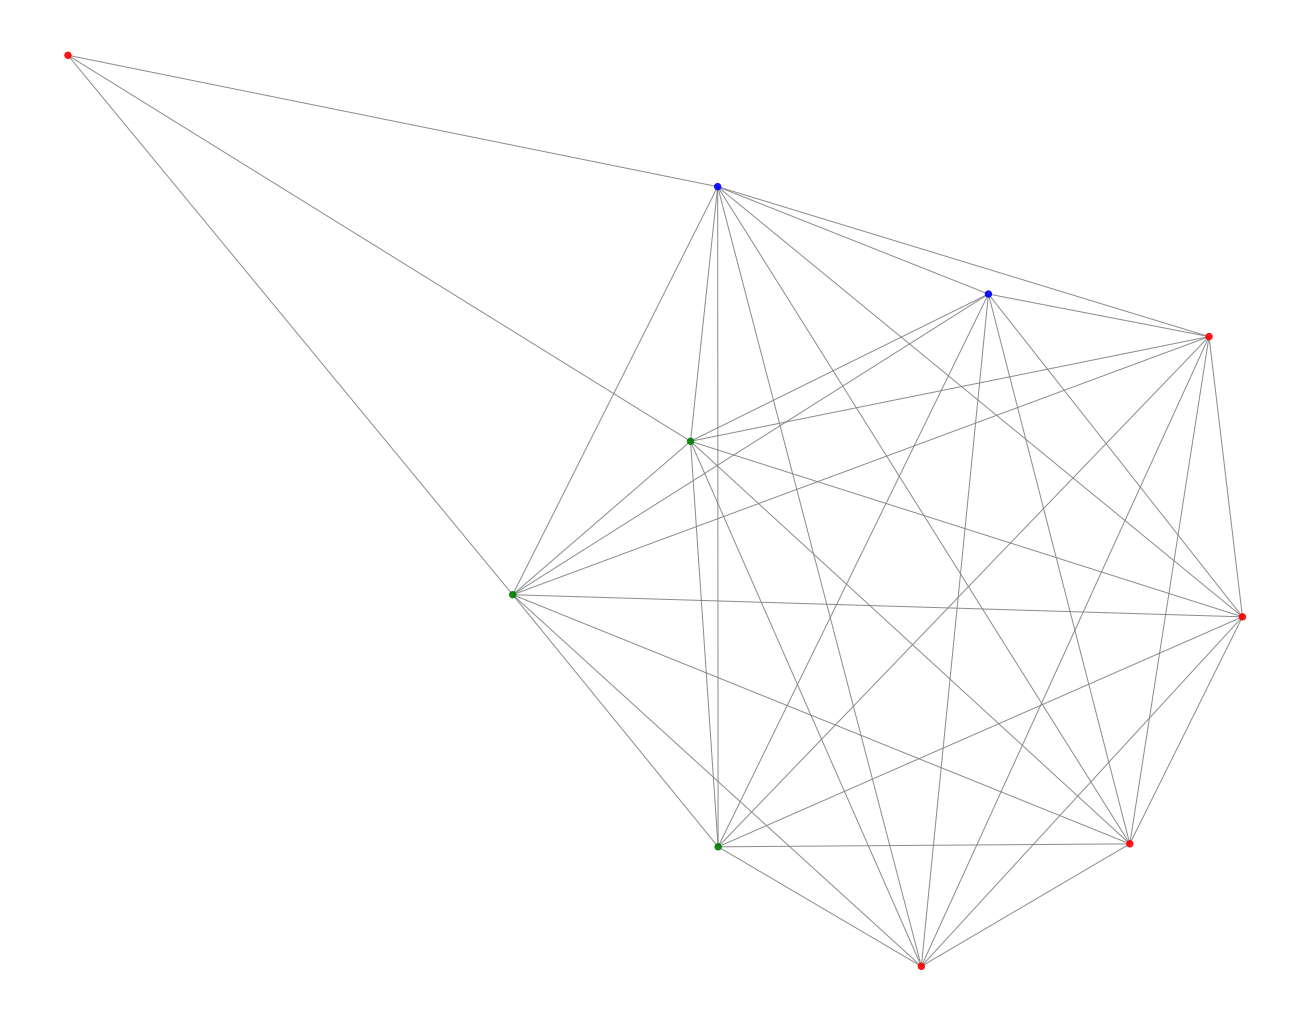

In [44]:
color_list_of_nodes_in_graph (list1 , list2 , G_sample) 

In [45]:
degree_centrality = nx.degree_centrality(G_sample)
closeness_centralirty = nx.closeness_centrality(G_sample)
betweenness_centrality = nx.betweenness_centrality(G_sample)

In [46]:
degree_centrality

{152: 0.3333333333333333,
 275: 1.0,
 181: 1.0,
 4: 1.0,
 273: 0.8888888888888888,
 218: 0.8888888888888888,
 328: 0.8888888888888888,
 195: 0.8888888888888888,
 78: 0.8888888888888888,
 306: 0.8888888888888888}

In [47]:
closeness_centralirty

{152: 0.6,
 275: 1.0,
 181: 1.0,
 4: 1.0,
 273: 0.9,
 218: 0.9,
 328: 0.9,
 195: 0.9,
 78: 0.9,
 306: 0.9}

In [48]:
betweenness_centrality

{152: 0.0,
 275: 0.05555555555555555,
 181: 0.05555555555555555,
 4: 0.05555555555555555,
 273: 0.0,
 218: 0.0,
 328: 0.0,
 195: 0.0,
 78: 0.0,
 306: 0.0}

In [49]:
# I will make an assumptition that the degree centrality is more important than the other two centrality measure 
# I will as well combine the three cnetrality measure in one single measure (Average for the moment)

centrality = {}
for key in degree_centrality.keys() : 
    centrality[key]= 1/2*degree_centrality[key] + 1/4*closeness_centralirty[key] + 1/4*betweenness_centrality[key]

In [50]:
centrality

{152: 0.31666666666666665,
 275: 0.7638888888888888,
 181: 0.7638888888888888,
 4: 0.7638888888888888,
 273: 0.6694444444444444,
 218: 0.6694444444444444,
 328: 0.6694444444444444,
 195: 0.6694444444444444,
 78: 0.6694444444444444,
 306: 0.6694444444444444}

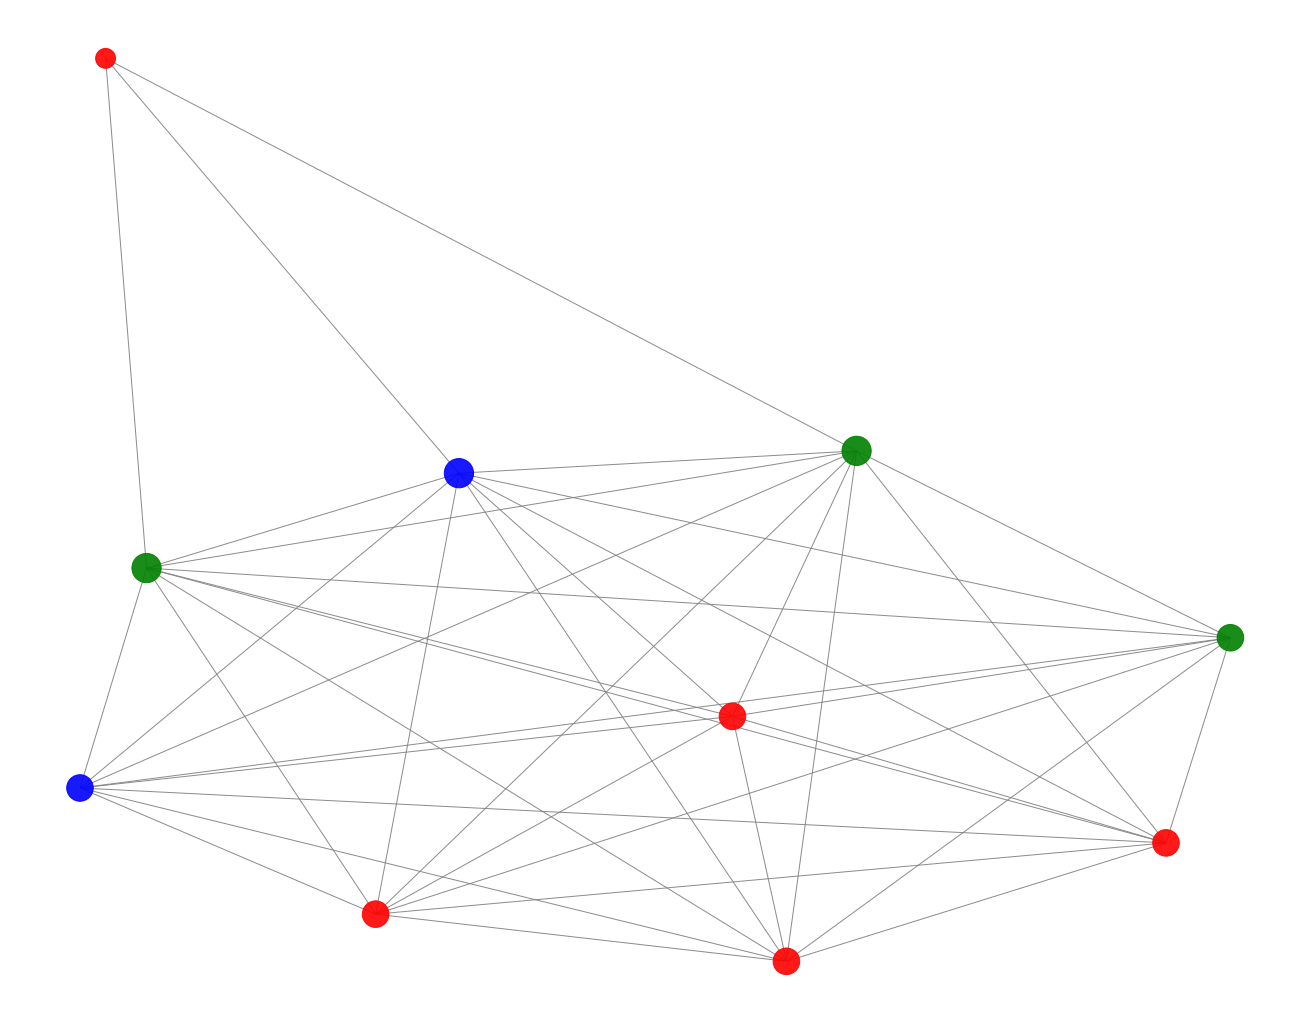

In [51]:
color_list_of_nodes_in_graph_centrality (list1 , list2 , G_sample , centrality)

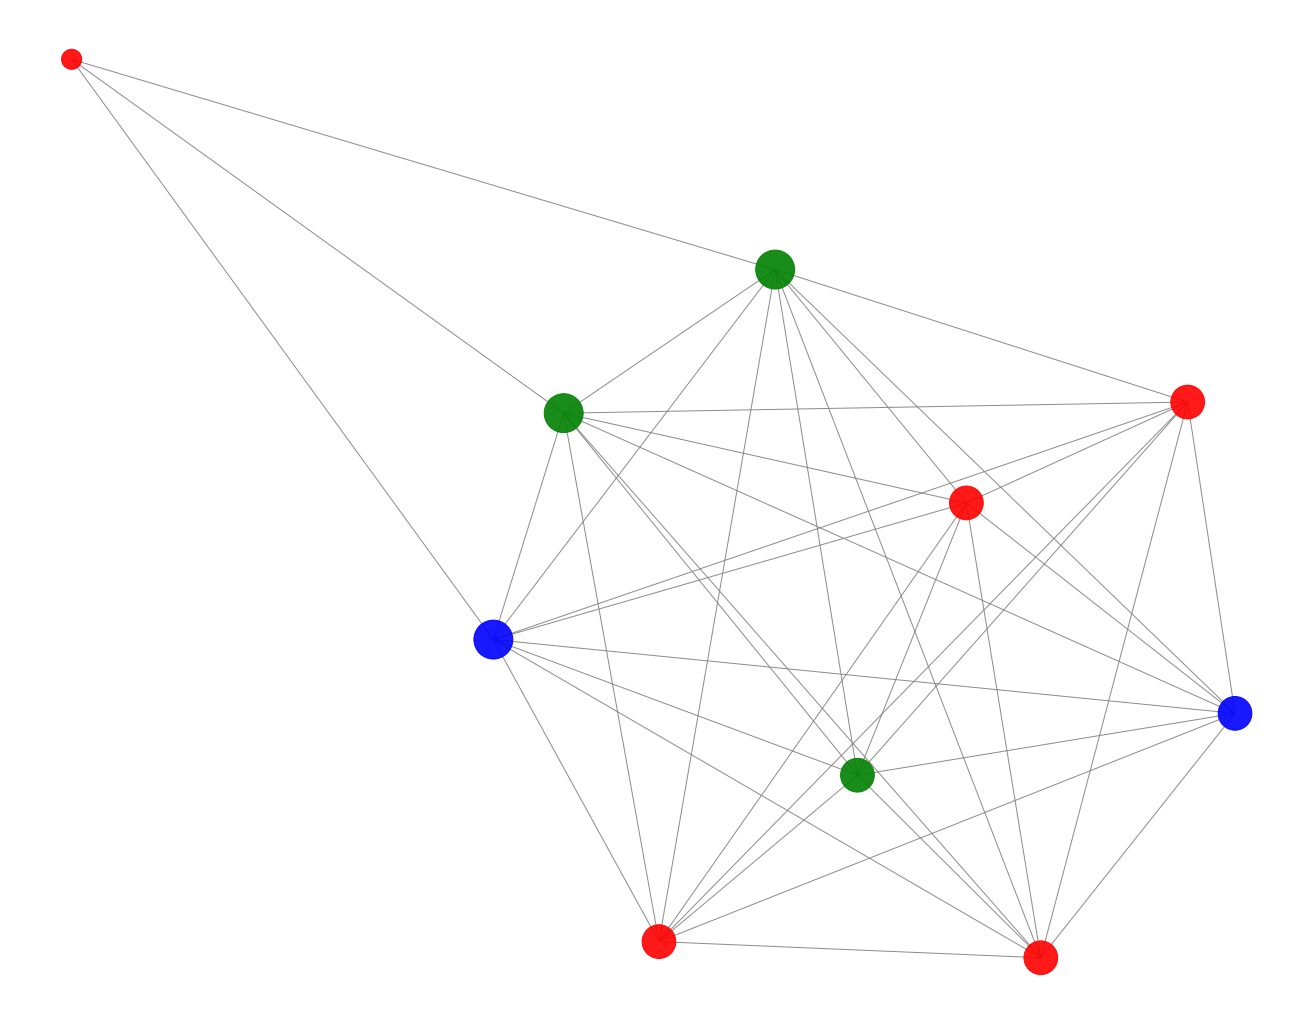

In [52]:
color_list_of_nodes_in_graph_centrality (list1 , list2 , G_sample , degree_centrality)

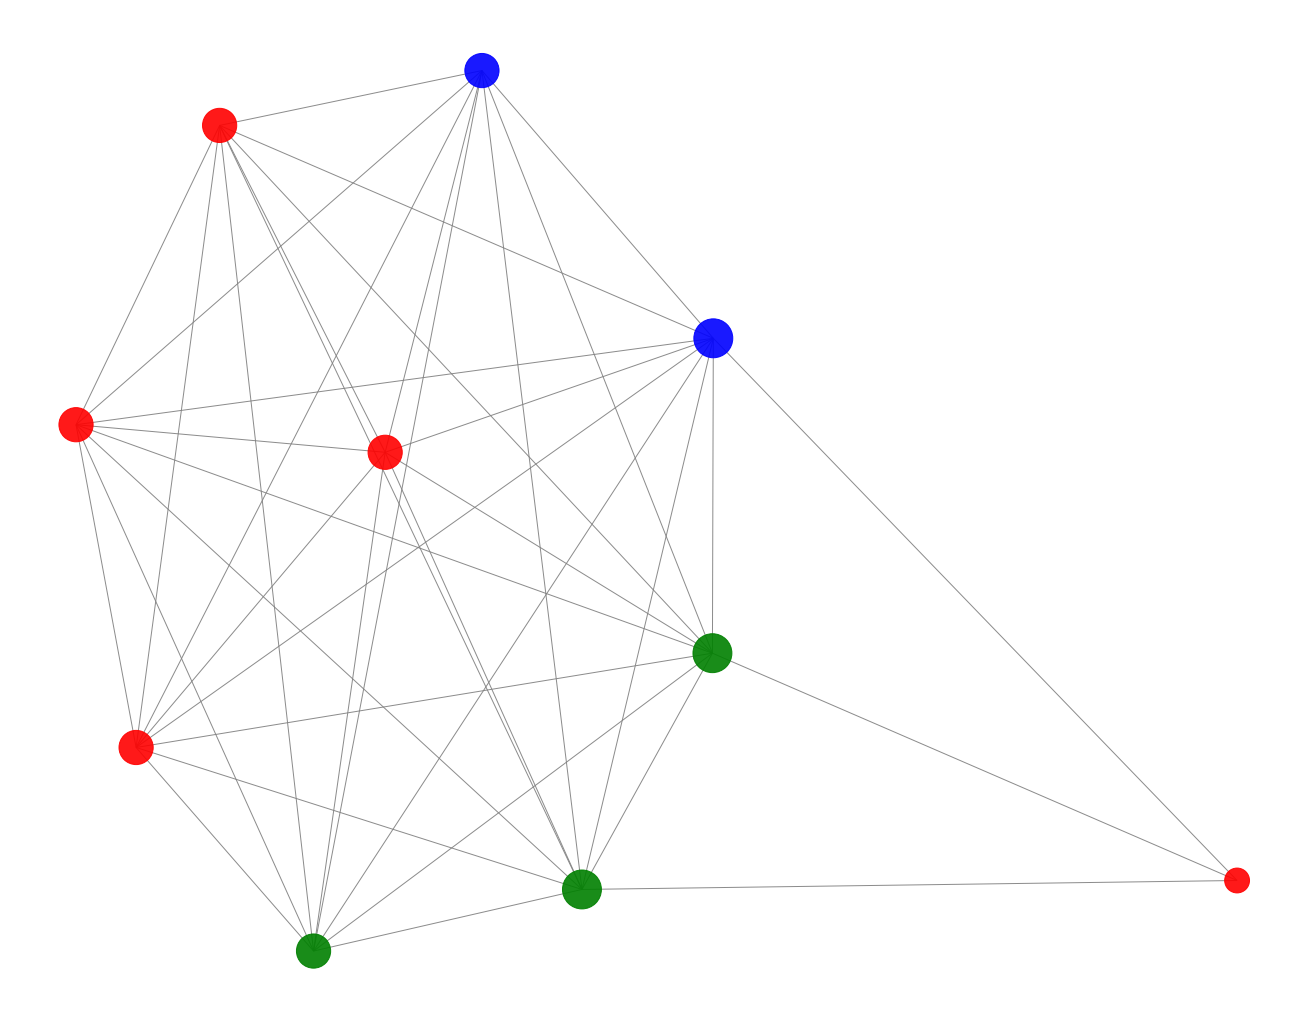

In [53]:
color_list_of_nodes_in_graph_centrality (list1 , list2 , G_sample , closeness_centralirty)

##### id : 1

In [54]:
sample_array=np.array(numpy_matrix)

In [55]:
# number of community
k = 1

In [56]:
# number of nodes in the k th community 
len(list_of_communities[k])

93

In [57]:
list_edges_community_k = []
for i in range(sample_array.shape[0]): 
    if sample_array[i][0] in list_of_communities[k] : 
        if sample_array[i][1] in list_of_communities[k] : 
            list_edges_community_k.append([sample_array[i][0],sample_array[i][1]])

In [58]:
# creating an array of the k th community 
sample_array=np.array(list_edges_community_k)

In [59]:
# number of edges in the community 
sample_array.shape

(319, 2)

In [60]:
# creating the G_sample graph of the k th community 

# Instantiate the graph
G_sample = nx.Graph()
# add node/edge pairs
G_sample.add_edges_from(sample_array)

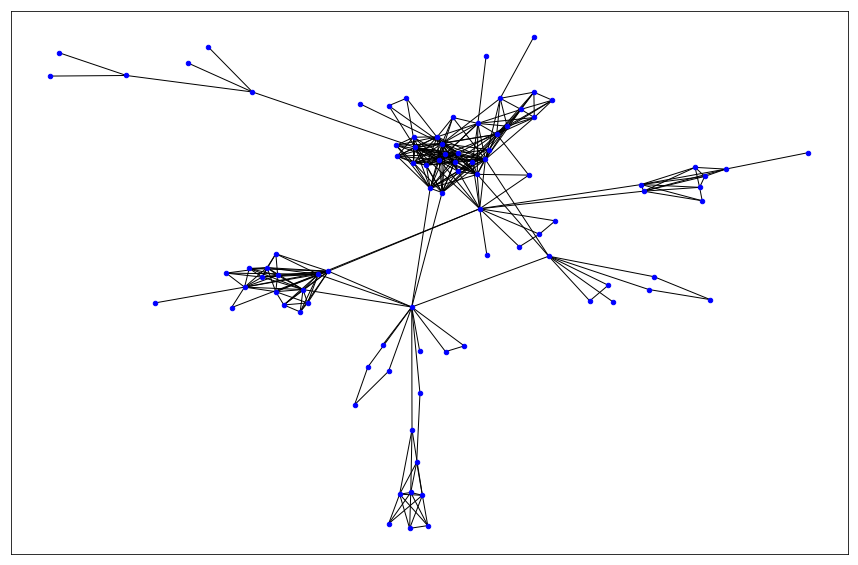

In [61]:
draw_graph (G_sample)

In [62]:
add_score(G_sample,score)

In [63]:
bad_good_lists (G_sample)

list1=bad_good_lists (G_sample)[0]
list2=bad_good_lists (G_sample)[1]

In [64]:
i=0 
for edge in G_sample.edges(): 
    
    G_sample[edge[0]][edge[1]]['weight']=G[edge[0]][edge[1]]['weight']
    i+=1

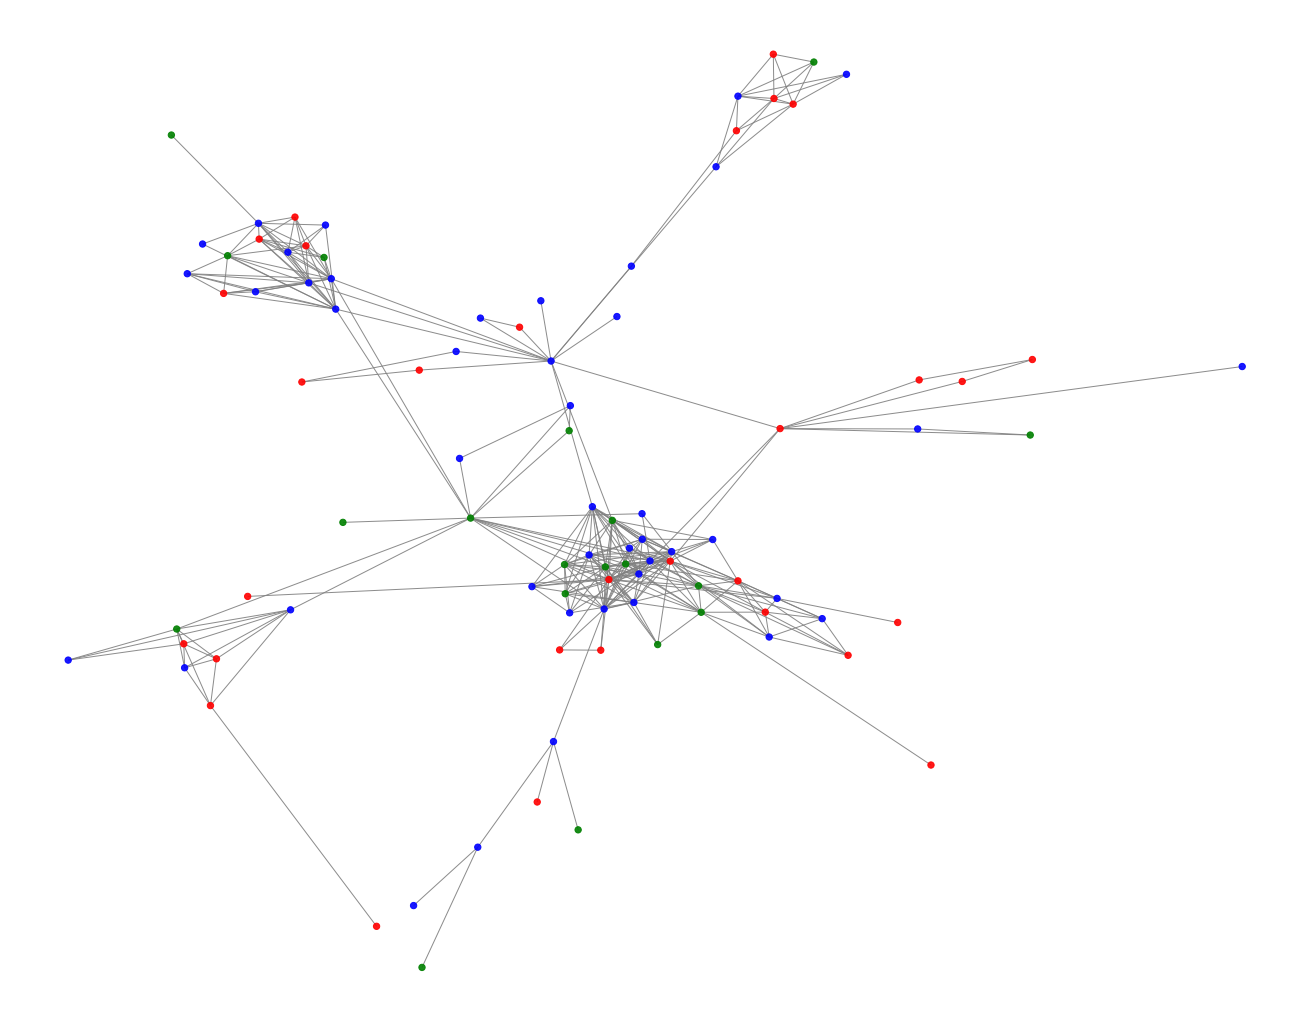

In [65]:
color_list_of_nodes_in_graph (list1 , list2 , G_sample) 

In [191]:
degree_centrality = nx.degree_centrality(G)
closeness_centralirty = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

# I will make an assumptition that the degree centrality is more important than the other two centrality measure 
# I will as well combine the three cnetrality measure in one single measure (Average for the moment)
centrality = {}
for key in degree_centrality.keys() : 
    centrality[key]= 1/2*degree_centrality[key] + 1/4*closeness_centralirty[key] + 1/4*betweenness_centrality[key]

In [67]:
centrality

{236: 0.04621397913881731,
 186: 0.04722045361175952,
 84: 0.04278725358495107,
 62: 0.044376983312937275,
 142: 0.047095630143030816,
 252: 0.054273718060984515,
 169: 0.05327758718603612,
 280: 0.05156338507367313,
 257: 0.04377349264594989,
 297: 0.04881702112074751,
 303: 0.04407163604966626,
 105: 0.04749997165446849,
 276: 0.04334653309711018,
 272: 0.04835884429638994,
 88: 0.04558041299136404,
 271: 0.05534135472781576,
 13: 0.04970491715076081,
 69: 0.04225051633591851,
 133: 0.043870709715922884,
 30: 0.044466351552469266,
 121: 0.042921289063431865,
 21: 0.05886725888198551,
 26: 0.05466961358677865,
 304: 0.05574977197996517,
 122: 0.058108448996272245,
 224: 0.04508109966147401,
 314: 0.04050769984909014,
 315: 0.057701538860313296,
 213: 0.055003353133349524,
 67: 0.05988310694670936,
 318: 0.046849874178679,
 322: 0.058827780699688866,
 141: 0.04469380842158224,
 25: 0.056779141286735245,
 1: 0.04787367715653638,
 200: 0.05321276706721757,
 248: 0.04847773618424387,
 341

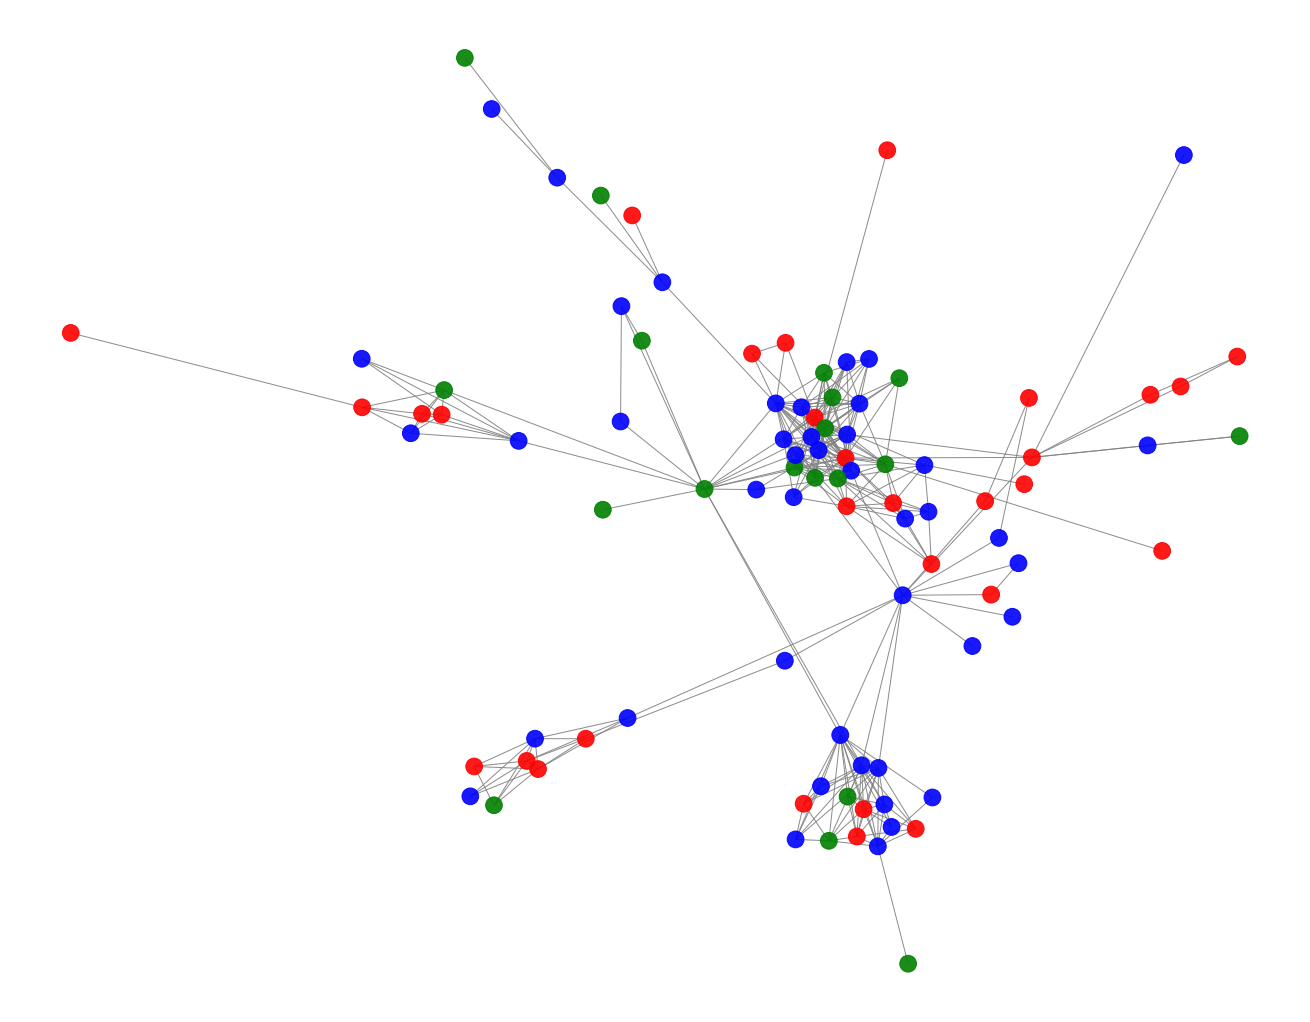

In [68]:
color_list_of_nodes_in_graph_centrality (list1 , list2 , G_sample , centrality)

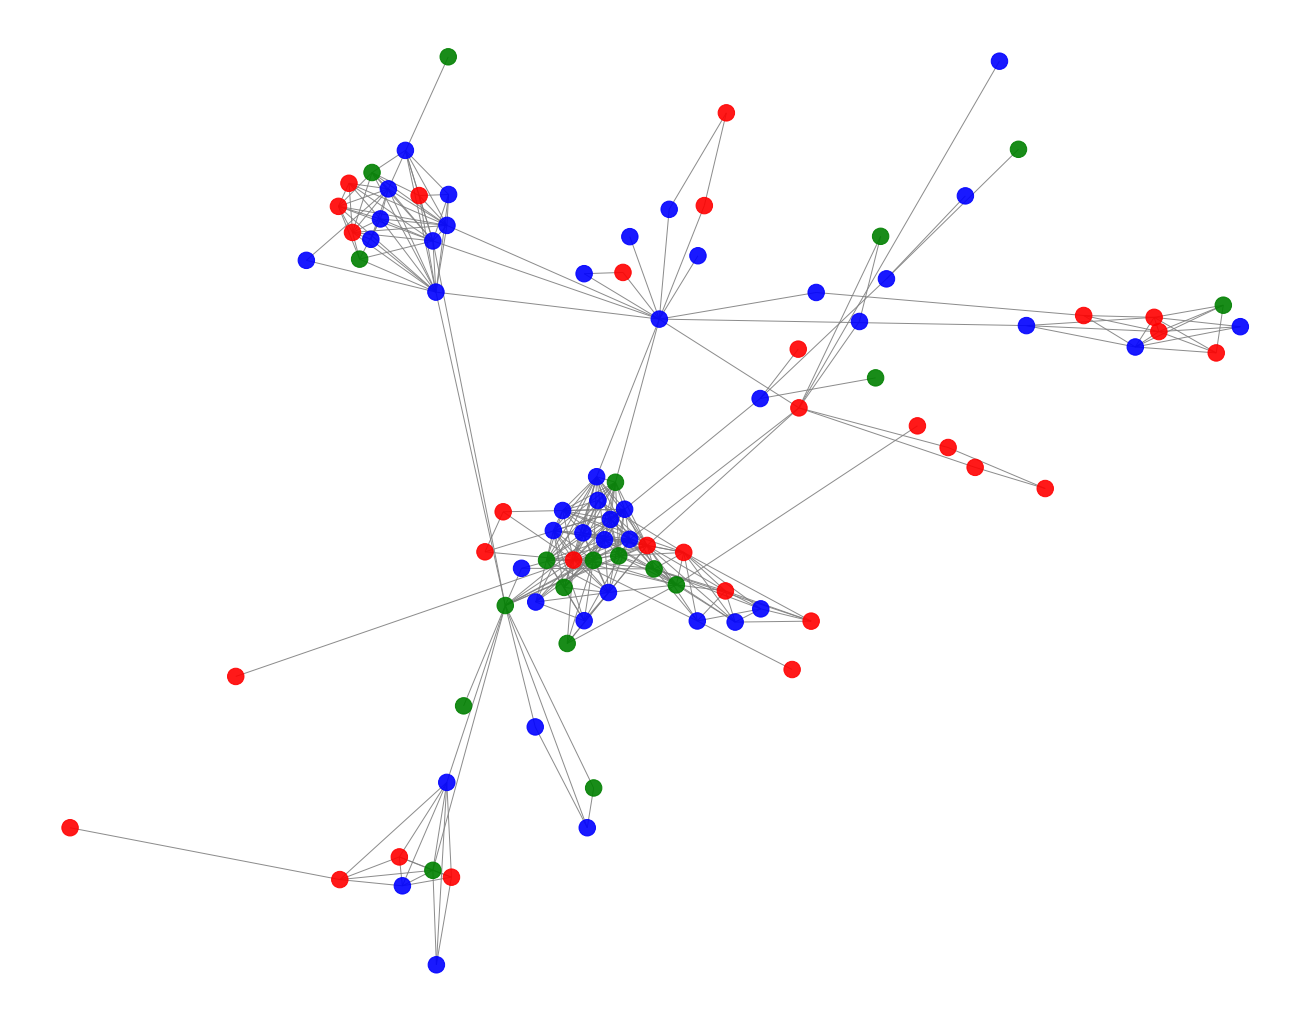

In [69]:
color_list_of_nodes_in_graph_centrality (list1 , list2 , G_sample , degree_centrality)

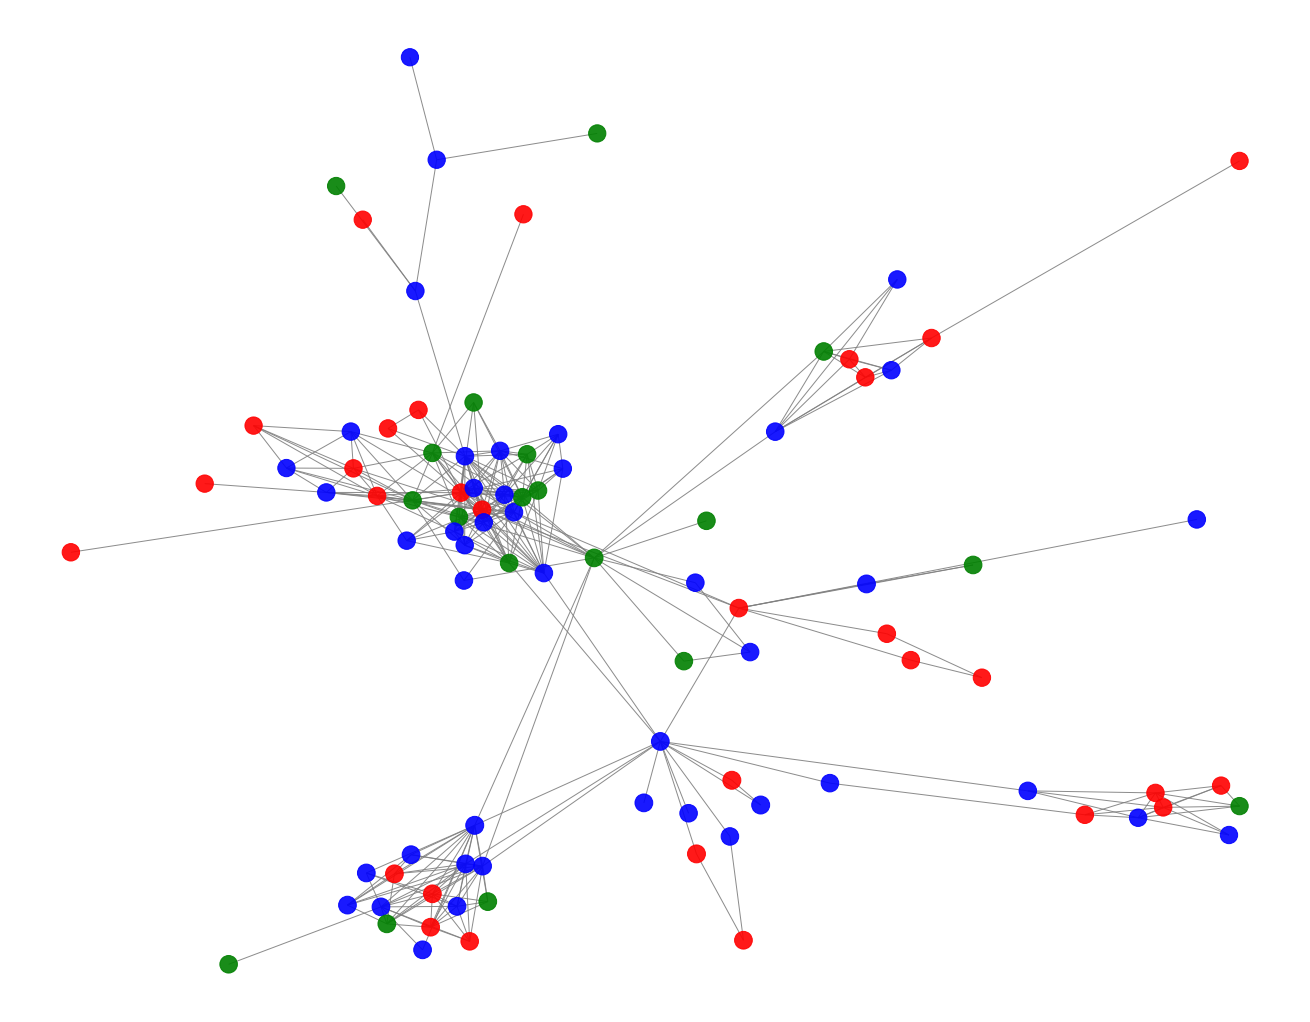

In [70]:
color_list_of_nodes_in_graph_centrality (list1 , list2 , G_sample , closeness_centralirty)

### 6) Focusing on one node 

In [141]:
extra_node = 200

In [142]:
sample_array = np.array(numpy_matrix)

In [143]:
list_of_community=[extra_node]

In [144]:
list_eges_community_k = []
for i in range(sample_array.shape[0]): 
    if sample_array[i][0] in list_of_community or sample_array[i][1] in list_of_community : 
            list_eges_community_k.append([sample_array[i][0],sample_array[i][1]])

In [145]:
# creating an array of the k th community 
sample_array=np.array(list_eges_community_k)

In [146]:
# number of edges in the community 
sample_array.shape

(56, 2)

In [147]:
# creating the G_sample graph of the k th community 

# Instantiate the graph
G_sample = nx.Graph()
# add node/edge pairs
G_sample.add_edges_from(sample_array)

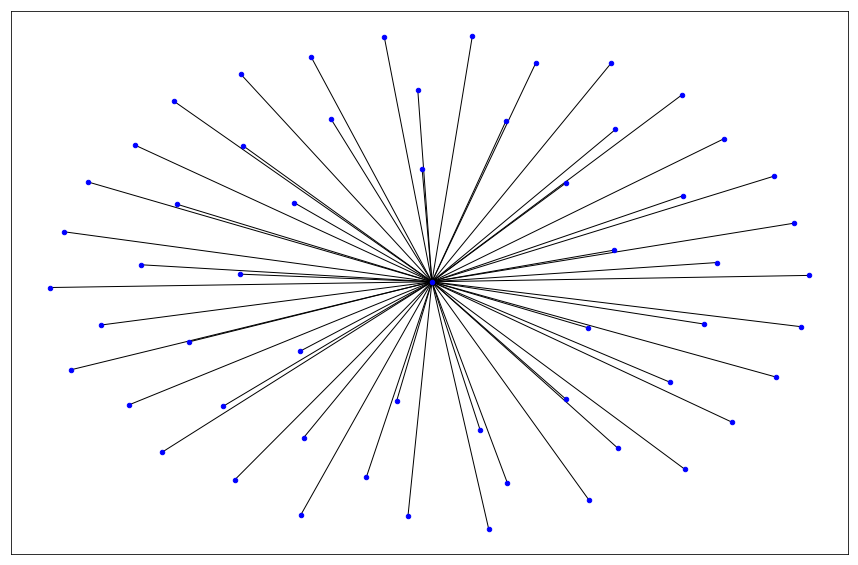

In [148]:
draw_graph (G_sample)

In [149]:
add_score(G_sample,score)

In [150]:
i=0 
for edge in G_sample.edges(): 
    print(edge)
    random = rand[i][0]
    try :
        G_sample[edge[0]][edge[1]]['weight']= weights[(edge[0],edge[1])]
    except : 
        G_sample[edge[0]][edge[1]]['weight']= weights[(edge[1],edge[0])]
    i+=1

(236, 200)
(200, 186)
(200, 62)
(200, 142)
(200, 252)
(200, 280)
(200, 297)
(200, 276)
(200, 271)
(200, 30)
(200, 21)
(200, 26)
(200, 304)
(200, 122)
(200, 224)
(200, 67)
(200, 322)
(200, 25)
(200, 285)
(200, 9)
(200, 332)
(200, 199)
(200, 239)
(200, 3)
(200, 170)
(200, 56)
(200, 103)
(200, 188)
(200, 119)
(200, 323)
(200, 98)
(200, 123)
(200, 109)
(200, 277)
(200, 55)
(200, 40)
(200, 39)
(200, 232)
(200, 75)
(200, 203)
(200, 72)
(200, 118)
(200, 104)
(200, 45)
(200, 31)
(200, 325)
(200, 248)
(200, 113)
(200, 223)
(200, 165)
(200, 185)
(200, 324)
(200, 79)
(200, 334)
(200, 274)
(200, 10)


In [151]:
bad_good_lists (G_sample)

list1=bad_good_lists (G_sample)[0]
list2=bad_good_lists (G_sample)[1]

In [154]:
len(list1)

20

In [155]:
len(list2)

12

In [158]:
len(G_sample.nodes())

57

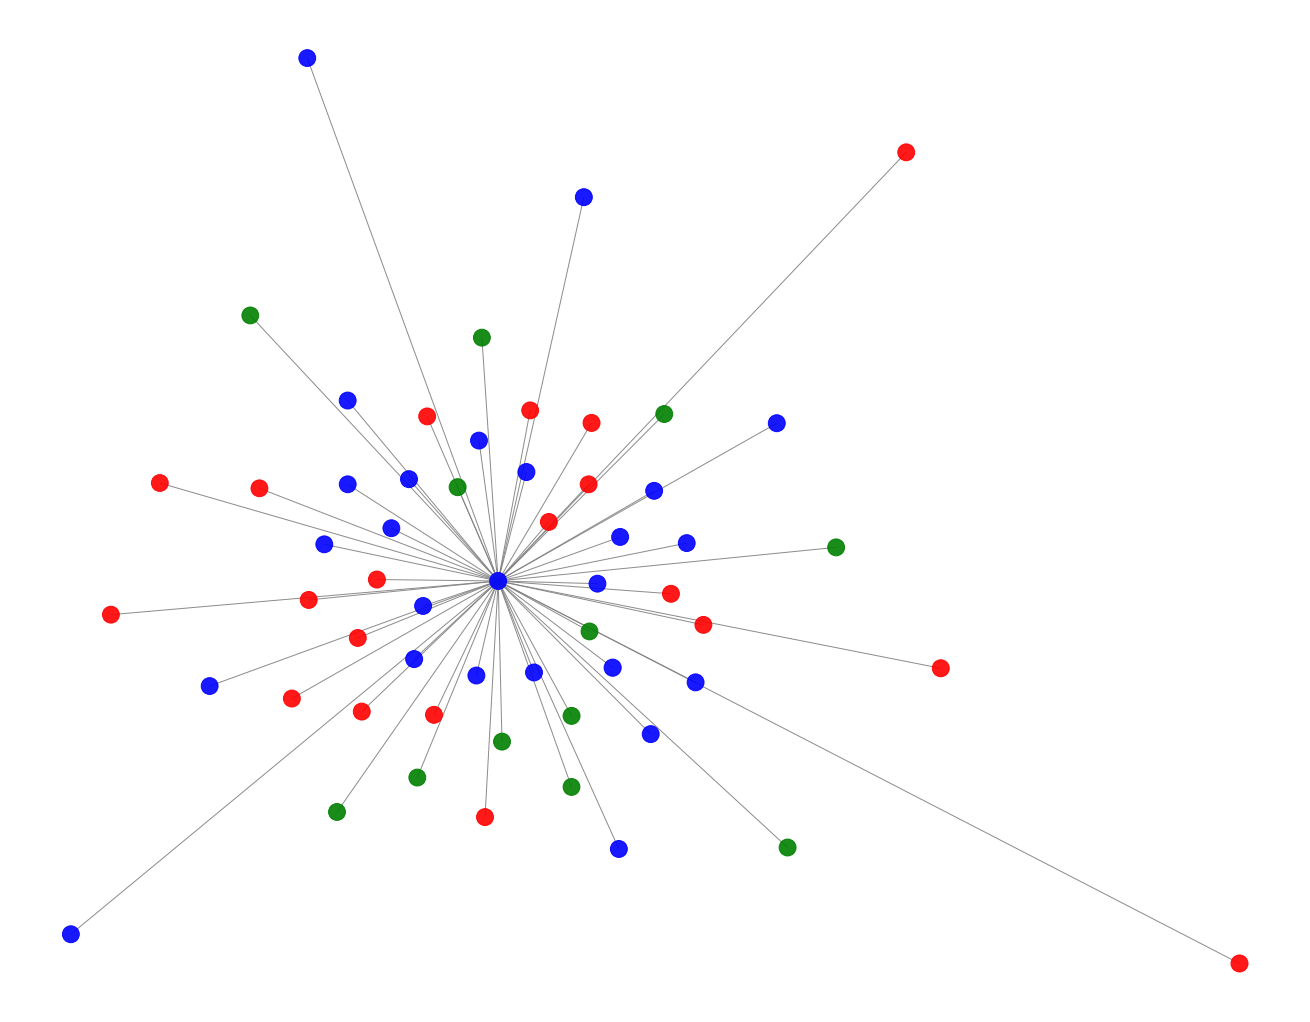

In [152]:
color_list_of_nodes_in_graph_centrality (list1 , list2 , G_sample , centrality)

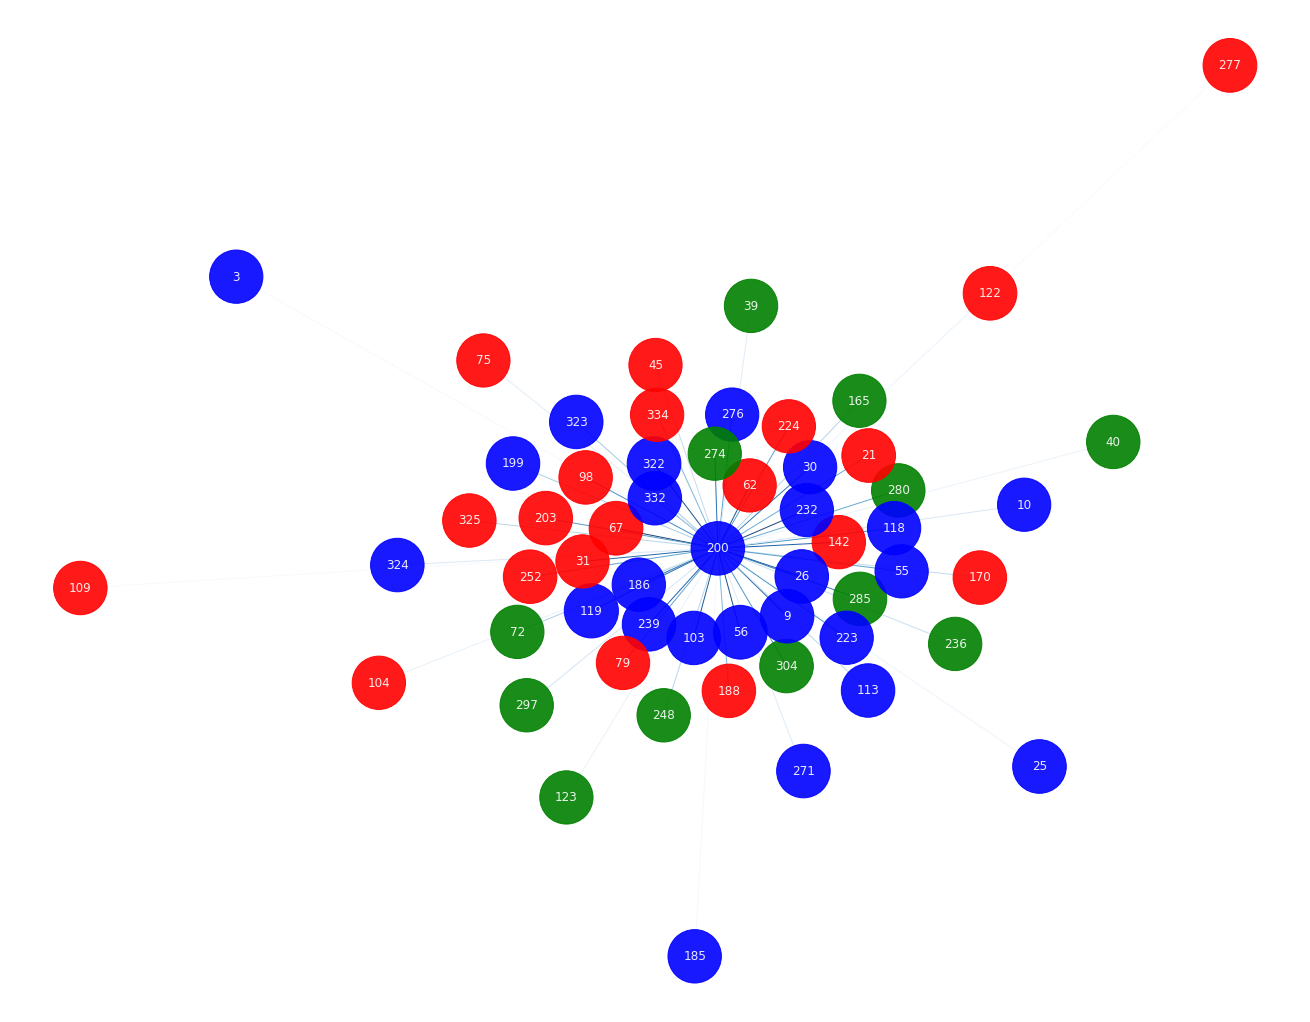

In [153]:
color_list_of_nodes_in_graph_centrality_weight (list1 , list2 , G_sample , centrality)

### 7) Predicting a future score for each node by considering the influence of people on that person

###  Giving importance to the weights of the nodes 

##### * I will continue with same previous node 

In [159]:
New_Bad_Score = 0
New_Good_Score = 0
New_Ordinary_Score = 0

for node in list1 : 
    # The very bad people 
    if node != extra_node :
        New_Bad_Score += centrality[node] * G.edges[(extra_node,node)]['weight']

for node in list2 :
    # The very good people
    if node != extra_node :
        New_Good_Score += centrality[node] * G.edges[(extra_node,node)]['weight']

a=0
for node in G_sample.nodes() :
        if node in list1 :
            a=0
        elif node in list2 : 
            a=0
        else: 
            if node != extra_node :
                New_Ordinary_Score += centrality[node] * G.edges[(extra_node,node)]['weight']

In [207]:
degree_centrality_middle_node=degree_centrality[extra_node]*100

In [208]:
closeness_centrality_middle_node =closeness_centralirty[extra_node]*100

In [209]:
betweenness_centrality_middle_node =betweenness_centrality[extra_node]*100

In [210]:
centrality_middle_node = betweenness_centrality[extra_node]*100

In [211]:
bad_likelihood = New_Bad_Score 

In [212]:
good_likelihood = New_Good_Score

In [213]:
ordinary_likelihood = New_Ordinary_Score

In [214]:
number_of_bad_node = len(list1)

In [215]:
number_of_good_node = len(list2)

### The metrics to estimate the score of the middle node 

In [216]:
# Assumption: important nodes have many connections
degree_centrality_middle_node

1.4148559878726632

In [217]:
# Assumption: important nodes are close to other nodes
closeness_centrality_middle_node

18.405608831286024

In [218]:
# Assumption: important nodes connect other nodes
betweenness_centrality_middle_node

0.04978601985568041

In [219]:
# combines the three metrics of centrality and considering the weights between each node 
centrality_middle_node 

0.04978601985568041

In [220]:
number_of_bad_node

20

In [221]:
number_of_good_node

12

In [222]:
bad_likelihood

0.5380147684895126

In [223]:
good_likelihood

0.26994954599387383

In [206]:
ordinary_likelihood

0.7840969587535204